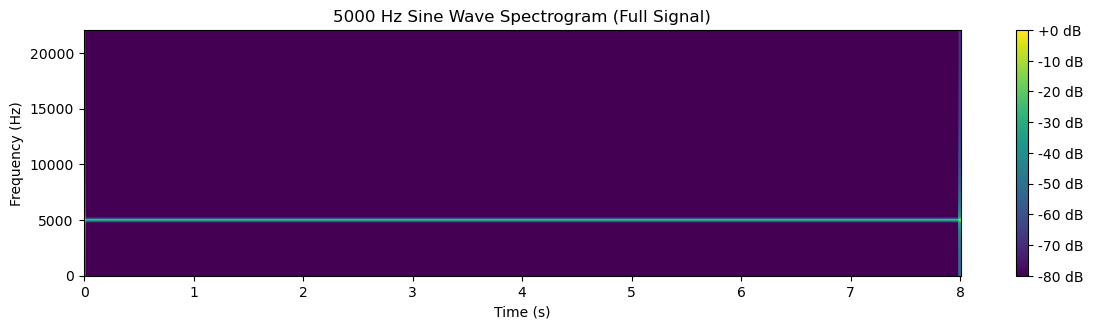

In [18]:
#When run this code will generate a 5000 Hz sine tone, play it, and save it to a wav.file. The spectrogram of the audio will also be generated. 

import numpy as np
from scipy.io import wavfile
from matplotlib import pyplot as plt
import os
import librosa
import librosa.display
from playsound import playsound
import sounddevice as sd

SAMPLE_RATE = 44100  # Hertz
DURATION = 8  # Seconds.
file_name = "SC_sinetone.wav"

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    y_int = np.int16(y * 32767) 
    return x, y_int

# Generate a 5000 hertz sine wave that lasts for 8 seconds
x, y = generate_sine_wave(5000, SAMPLE_RATE, DURATION)

# Save normalized tone to wav file and play audio
def play_tone(y):  
    wavfile.write(file_name, SAMPLE_RATE, y)
    fs, data = wavfile.read(file_name)
    sd.play(data, fs)
    sd.wait()

# load audio wav file
def load_audio(file_name, sample_rate=44100):
    script_directory = os.getcwd() 
    file_path = os.path.join(script_directory, file_name)
    audio, sr = librosa.load(file_path, sr=sample_rate, mono=False)
    return audio, sr

# perform STFT on signal to calculate spectrogram
def calculate_spectrogram(audio, sample_rate):
    mono_audio = librosa.to_mono(audio)
    stft = librosa.stft(mono_audio)
    spectrogram = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
    return spectrogram

# Plot corresponding spectrograms 
def visualize_audio(audio, sample_rate, plot_name):
    spectrogram = calculate_spectrogram(audio, sample_rate)
    
    # Plot the full signal's spectrogram
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    librosa.display.specshow(spectrogram, sr=sample_rate, x_axis="time", y_axis="linear", cmap='viridis')
    plt.colorbar(format="%+2.0f dB")
    plt.title(plot_name + ' (Full Signal)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()

def plot_spectrogram(file_name):
    plot_name = '5000 Hz Sine Wave Spectrogram'
    audio, sample_rate = load_audio(file_name)
    visualize_audio(audio, sample_rate, plot_name)
    

play_tone(y)    
plot_spectrogram(file_name)
    

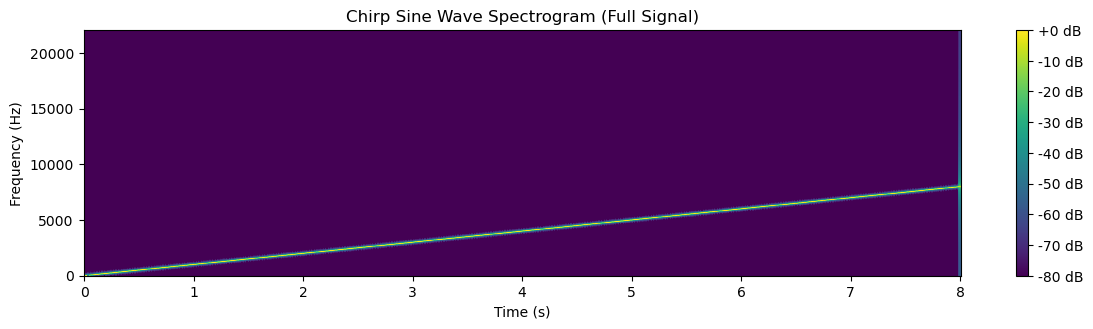

In [19]:
#When run this code will generate a 0-8000 Hz chirp sine tone, play it, and save it to a wav.file. The spectrogram of the audio will also be generated. 

SAMPLE_RATE = 44100  # Hertz
DURATION = 8  # Seconds.
file_name = "SC_chirp.wav"


def generate_chirp(sample_rate, duration):
    t = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = 8000 * t/ duration 
        # 2pi because np.sin takes radians
    chirp = np.sin((2 * np.pi) * np.clip(frequencies, 0, 8000) * t / 2)
    chirp_int = np.int16(chirp * 32767) 
    return chirp_int

# Save normalized tone to wav file and play audio
def play_tone(chirp):  
    wavfile.write(file_name, SAMPLE_RATE, chirp)
    fs, data = wavfile.read(file_name)
    sd.play(data, fs)
    sd.wait()
# load audio wav file
def load_audio(file_name, sample_rate=44100):
    script_directory = os.getcwd() 
    file_path = os.path.join(script_directory, file_name)
    audio, sr = librosa.load(file_path, sr=sample_rate, mono=False)
    return audio, sr

# perform STFT on signal to calculate spectrogram
def calculate_spectrogram(audio, sample_rate):
    mono_audio = librosa.to_mono(audio)
    stft = librosa.stft(mono_audio)
    spectrogram = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
    return spectrogram

# Plot corresponding spectrograms 
def visualize_audio(audio, sample_rate, plot_name):
    spectrogram = calculate_spectrogram(audio, sample_rate)
    
    # Plot the full signal's spectrogram
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    librosa.display.specshow(spectrogram, sr=sample_rate, x_axis="time", y_axis="linear", cmap='viridis')
    plt.colorbar(format="%+2.0f dB")
    plt.title(plot_name + ' (Full Signal)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()

def plot_spectrogram(file_name):
    plot_name = 'Chirp Sine Wave Spectrogram'
    audio, sample_rate = load_audio(file_name)
    visualize_audio(audio, sample_rate, plot_name)    

chirp = generate_chirp(SAMPLE_RATE, DURATION)
play_tone(chirp)    
plot_spectrogram(file_name)

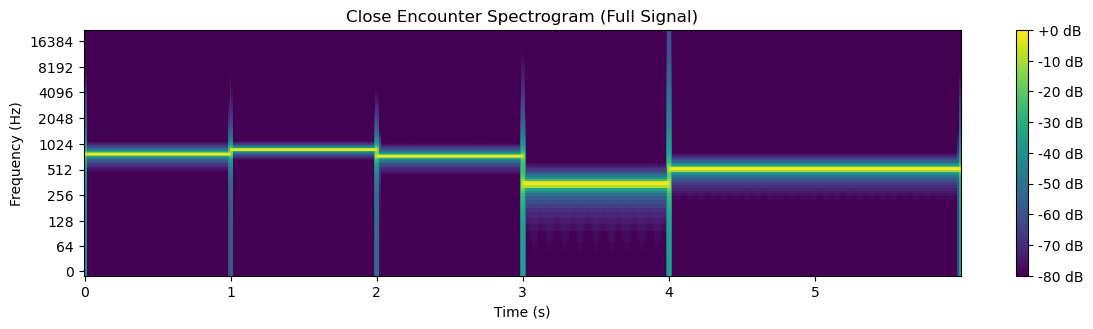

In [20]:
#When run this code will generate the famous five tone sequences from the movie "Close Encounters", play it, and save it to a wav.file. The spectrogram of the audio will also be generated. 

import numpy as np
from scipy.io import wavfile
import sounddevice as sd
import matplotlib.pyplot as plt
import librosa
import librosa.display

D = 587.33 #Hz
E = 659.25 #Hz
C = 523.25 #Hz
G = 783.99 #Hz
A = 880 #Hz
F1 = 739.99
F2 = 349.23

SAMPLE_RATE = 44100  # Hertz
DURATION = 1  # Seconds.
file_name = "SC_cetk.wav"


def generate_note(freq, sample_rate, duration):
    t = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = freq * t
        # 2pi because np.sin takes radians
    seq = np.sin((2 * np.pi) * frequencies)
    seq_int = np.int16(seq * 32767) 
    return seq_int

# Save tone to wav file and play audio
def play_tone(chirp):  
    wavfile.write(file_name, SAMPLE_RATE, chirp)
    fs, data = wavfile.read(file_name)
    sd.play(data, fs)
    sd.wait()
    
# load audio wav file
def load_audio(file_name, sample_rate=44100):
    script_directory = os.getcwd() 
    file_path = os.path.join(script_directory, file_name)
    audio, sr = librosa.load(file_path, sr=sample_rate, mono=False)
    return audio, sr

# perform STFT on signal to calculate spectrogram
def calculate_spectrogram(audio, sample_rate):
    mono_audio = librosa.to_mono(audio)
    stft = librosa.stft(mono_audio)
    spectrogram = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
    return spectrogram

# Plot corresponding spectrograms 
def visualize_audio(audio, sample_rate, plot_name):
    spectrogram = calculate_spectrogram(audio, sample_rate)
    
    # Plot the full signal's spectrogram
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    librosa.display.specshow(spectrogram, sr=sample_rate, x_axis="time", y_axis="log", cmap='viridis')
    plt.colorbar(format="%+2.0f dB")
    plt.title(plot_name + ' (Full Signal)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()

def plot_spectrogram(file_name):
    plot_name = 'Close Encounter Spectrogram'
    audio, sample_rate = load_audio(file_name)
    visualize_audio(audio, sample_rate, plot_name)
    

def generate_close_encounter():
    tone1_signal = generate_note(G, SAMPLE_RATE, 1)
    tone2_signal = generate_note(A, SAMPLE_RATE, 1)
    tone3_signal = generate_note(F1, SAMPLE_RATE, 1)
    tone4_signal = generate_note(F2, SAMPLE_RATE, 1)
    tone5_signal = generate_note(C, SAMPLE_RATE, 2)

    combined_signal = np.concatenate((tone1_signal, tone2_signal, tone3_signal, tone4_signal, tone5_signal))
    wavfile.write(file_name, SAMPLE_RATE, combined_signal)
    fs, data = wavfile.read(file_name)
    sd.play(data, fs)
    sd.wait()
    
generate_close_encounter()
plot_spectrogram(file_name)

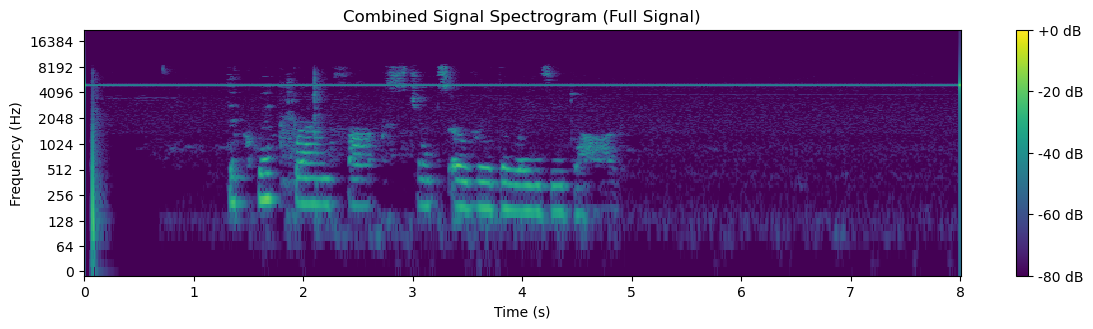

In [22]:
#When run this code will combine a speech audio file with the 5000 Hz sine tone generated previously, play it, and save it to a wav.file. The spectrogram of the audio will also be generated. 

import numpy as np
from scipy.io import wavfile
import sounddevice as sd
import librosa
import matplotlib.pyplot as plt
import librosa.display


SAMPLE_RATE = 44100  # Hertz

def load_audio(file_name, sample_rate=44100):
    script_directory = os.getcwd() 
    file_path = os.path.join(script_directory, file_name)
    audio, sr = librosa.load(file_path, sr=sample_rate, mono=True)
    return audio, sr

def combined_signals(speech_file, sine_file, filename="SC-speechchirp.wav"):
    min_length = min(len(speech_file), len(sine_file)) #minimum length of audio vector 
    speech_file = speech_file[:min_length]
    sine_file = sine_file[:min_length]
    combined_signal = speech_file + sine_file #Combined signals
    
    # Save the combined signal to a WAV file
    wavfile.write(filename, SAMPLE_RATE, combined_signal)
    fs, data = wavfile.read(filename)
    sd.play(data, fs)
    sd.wait()

def calculate_spectrogram(audio, sample_rate):
    mono_audio = librosa.to_mono(audio)
    stft = librosa.stft(mono_audio)
    spectrogram = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
    return spectrogram

def visualize_audio(audio, sample_rate, plot_name):
    spectrogram = calculate_spectrogram(audio, sample_rate)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    librosa.display.specshow(spectrogram, sr=sample_rate, x_axis="time", y_axis="log", cmap='viridis')
    plt.colorbar(format="%+2.0f dB")
    plt.title(plot_name + ' (Full Signal)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()

def plot_spectrogram(file_name):
    plot_name = 'Combined Signal Spectrogram'
    audio, sample_rate = load_audio(file_name)
    visualize_audio(audio, sample_rate, plot_name)


# Load audio files
speech_file, _ = load_audio(r'C:\Users\sagec\OneDrive\Documents\ECE2312_Proj1_SC\phrase1.wav')
sine_file, _ = load_audio("SC_sinetone.wav")

# Combine signals and save to file
combined_signals(speech_file, sine_file)

# Plot the spectrogram of the combined signal
plot_spectrogram("SC-speechchirp.wav")



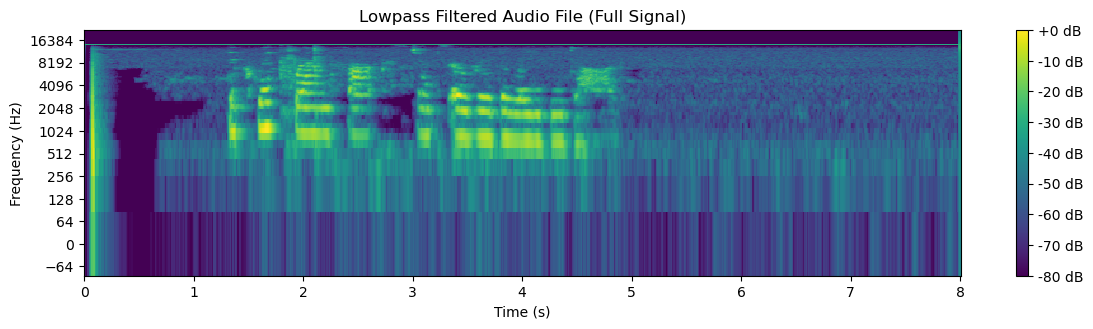

In [24]:
#When run this code will filter the combined signal using a 4000 Hz lowpass filter, play it, and save it to a wav.file. The spectrogram of the audio will also be generated. 

import numpy as np
import scipy.signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import sounddevice as sd
import librosa
import librosa.display

def lowpass(data: np.ndarray, cutoff: float, sample_rate: float, poles: int = 10):
    sos = scipy.signal.butter(poles, cutoff, 'lowpass', fs=sample_rate, output='sos')
    filtered_data = scipy.signal.sosfiltfilt(sos, data)
    return filtered_data

def low_pass(data: np.ndarray, sample_rate: float, filename: str):
    # Apply a 4000 Hz low-pass filter to audio file
    filtered = lowpass(data, 4000, sample_rate)
    filtered_int = np.int16(filtered * 32767)
    scipy.io.wavfile.write(filename, sample_rate, filtered_int)
    fs, filtered_data = scipy.io.wavfile.read(filename)
    sd.play(filtered_data, fs)
    sd.wait()

def calculate_spectrogram(audio, sample_rate):
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
    return log_spectrogram

def visualize_audio(audio, sample_rate, plot_name):
    spectrogram = calculate_spectrogram(audio, sample_rate)
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    librosa.display.specshow(spectrogram, sr=sample_rate, x_axis="time", y_axis="log", cmap='viridis')
    plt.colorbar(format="%+2.0f dB")
    plt.title(plot_name + ' (Full Signal)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()

def plot_spectrogram(file_name):
    plot_name = 'Lowpass Filtered Audio File'
    audio, sample_rate = librosa.load(file_name, sr=None, mono = True)
    visualize_audio(audio, sample_rate, plot_name)

# Load sample data from a WAV file
sample_rate, data = scipy.io.wavfile.read("SC-speechchirp.wav")

# Apply low-pass filter and save the filtered audio
low_pass(data, sample_rate, "SC-filteredspeechsine.wav")

# Plot the spectrogram of the filtered audio
plot_spectrogram("SC-filteredspeechsine.wav")



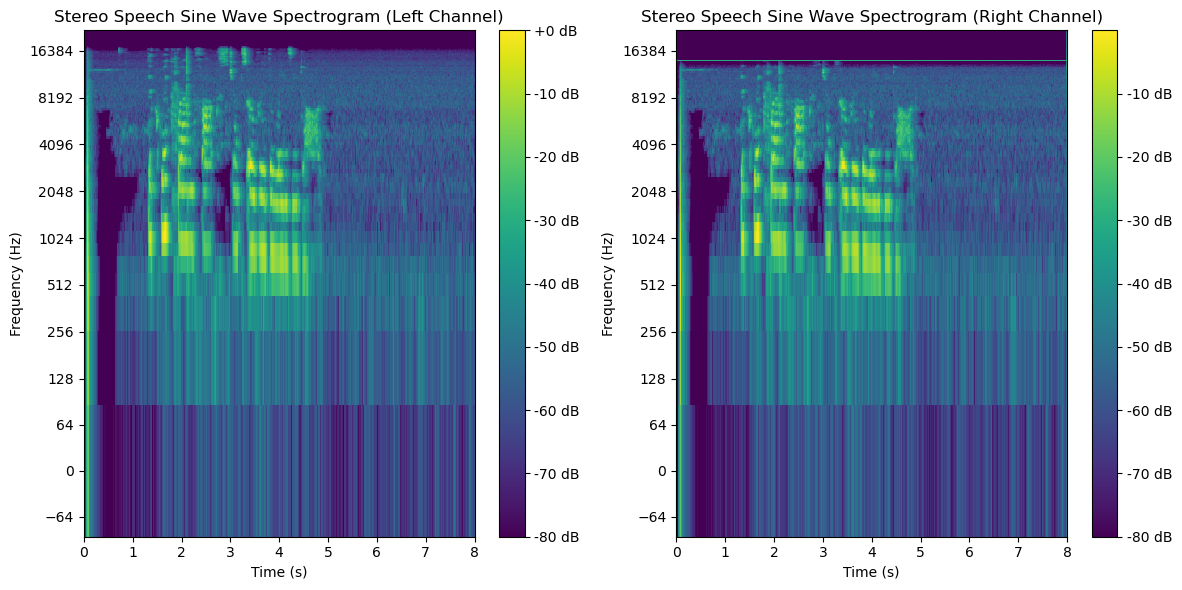

In [25]:
#When run this code will generate a stereo signal that consists of the speech file and the combined signal, play it, and save it to a wav.file. The spectrogram of the audio will also be generated. 

import os
import numpy as np
import librosa
import scipy.io.wavfile
import matplotlib.pyplot as plt
import librosa.display

filename = "SC-stereospeechsine.wav"

def mix_signals():
    # Define the file paths
    speech_file_path = r'C:\Users\sagec\OneDrive\Documents\ECE2312_Proj1_SC\phrase1.wav'
    filtered_file_path = r'SC-filteredspeechsine.wav'

    # Load the original speech file
    speech_audio, speech_sr = librosa.load(speech_file_path, sr=None, mono=True)

    # Load the filtered speech file with the added 5000 Hz sine tone
    filtered_audio, filtered_sr = librosa.load(filtered_file_path, sr=None, mono=True)

    # Combine the left and right channels into a single stereo signal
    stereo_audio_signal = np.column_stack((speech_audio, filtered_audio))
    return stereo_audio_signal, speech_sr  # Return stereo audio signal and sample rate

def play_signal(audio, sample_rate):
    # Write the stereo audio signal to a WAV file
    scipy.io.wavfile.write(filename, sample_rate, audio.astype(np.float32))
    fs, data = scipy.io.wavfile.read(filename)
    sd.play(data, fs)
    sd.wait()
    
def calculate_spectrogram(audio, sample_rate):
    if not isinstance(audio, np.ndarray):
        audio = np.array(audio)  # Convert to NumPy array if not already
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
    return log_spectrogram

def visualize_audio(audio, sample_rate, plot_name):
    spectrogram = calculate_spectrogram(audio, sample_rate)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    librosa.display.specshow(spectrogram[0], sr=sample_rate, x_axis="time", y_axis="log", cmap='viridis')
    plt.colorbar(format="%+2.0f dB")
    plt.title(plot_name + ' (Left Channel)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

    plt.subplot(1, 2, 2)
    librosa.display.specshow(spectrogram[1], sr=sample_rate, x_axis="time", y_axis="log", cmap='viridis')
    plt.colorbar(format="%+2.0f dB")
    plt.title(plot_name + ' (Right Channel)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

    plt.tight_layout()
    plt.show()

def plot_spectrogram(file_name):
    plot_name = 'Stereo Speech Sine Wave Spectrogram'
    audio_left, sample_rate = librosa.load(file_name, sr=None, mono=False)
    visualize_audio(audio_left, sample_rate, plot_name)

# Mix signals and play
stereo_audio_signal, speech_sr = mix_signals()
play_signal(stereo_audio_signal, speech_sr)

# Plot spectrograms of each channel of the stereo signal
plot_spectrogram(filename)

